### data collection toolkit

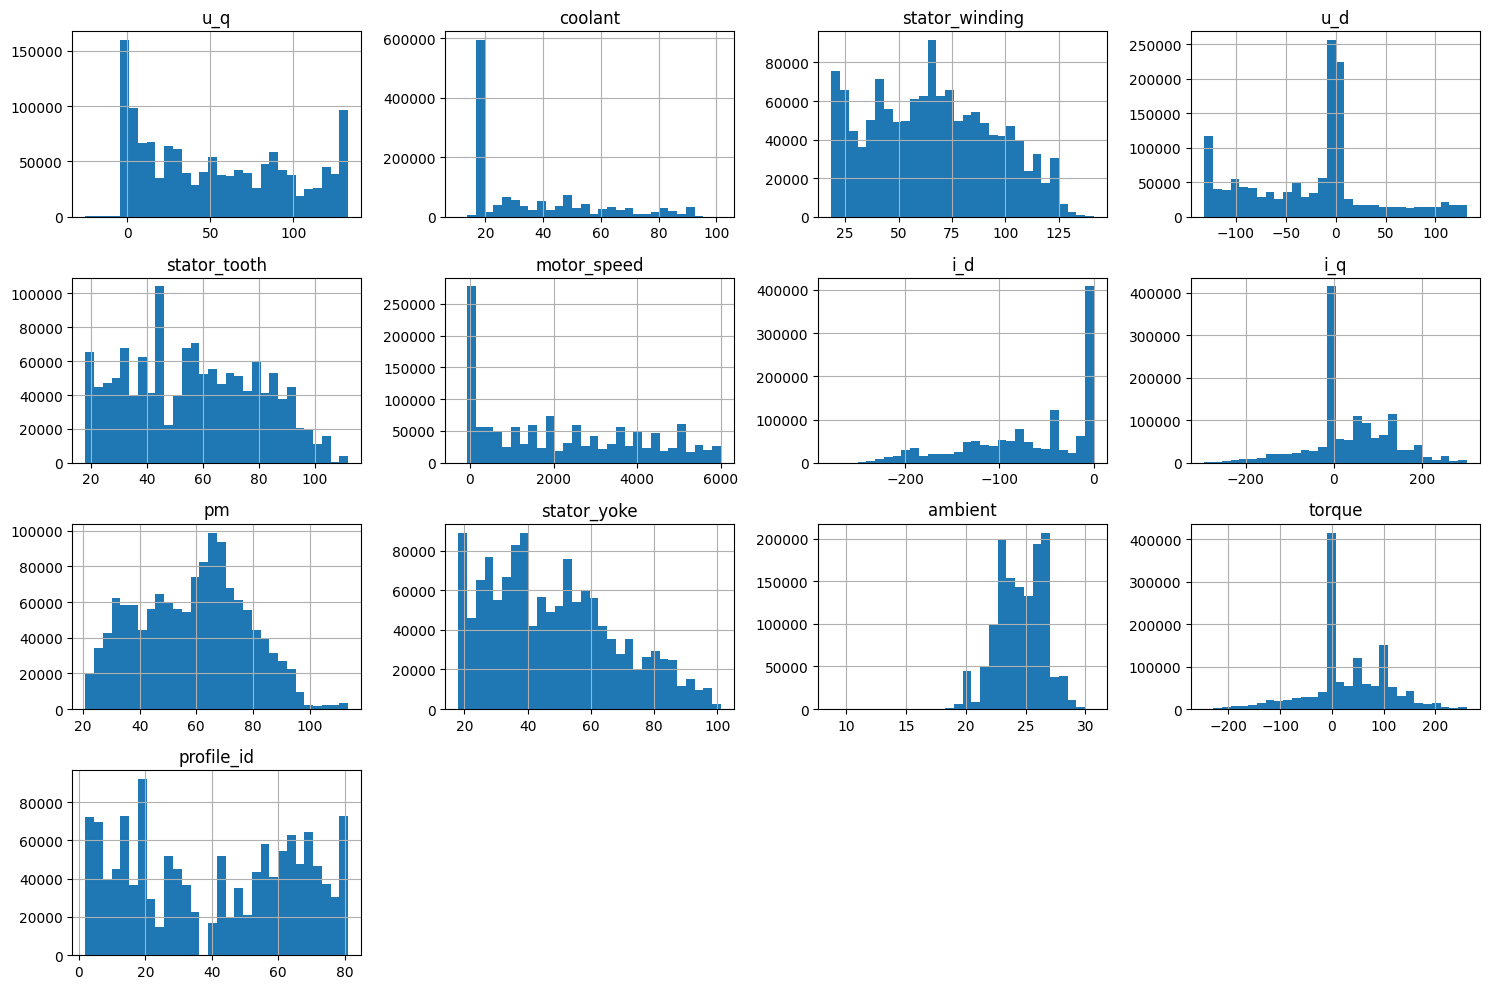

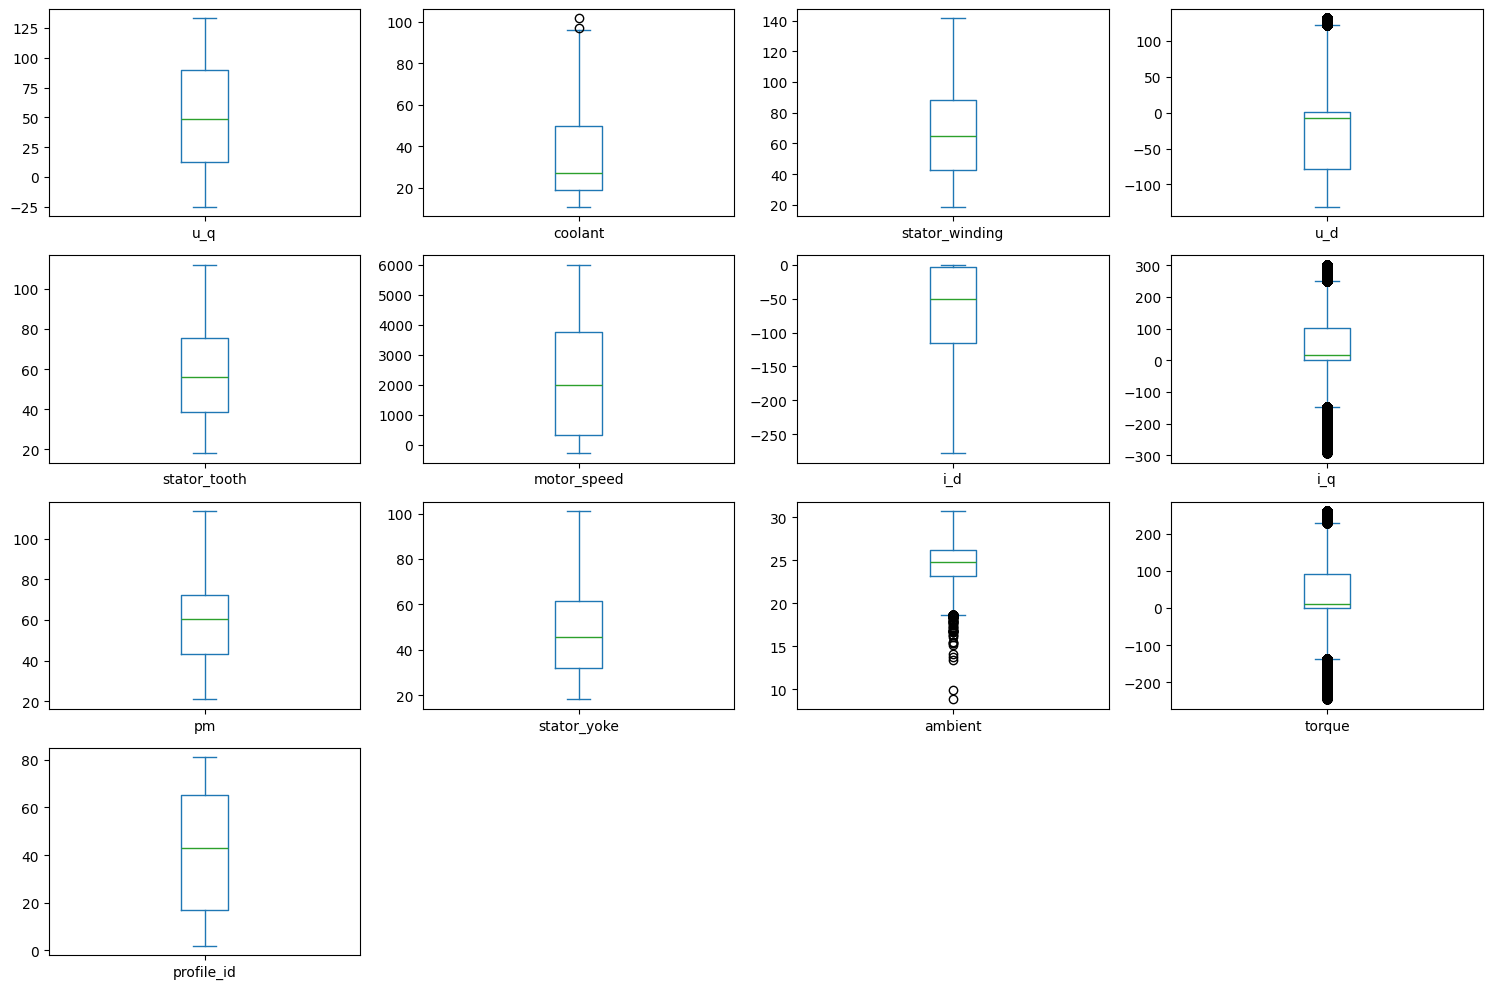

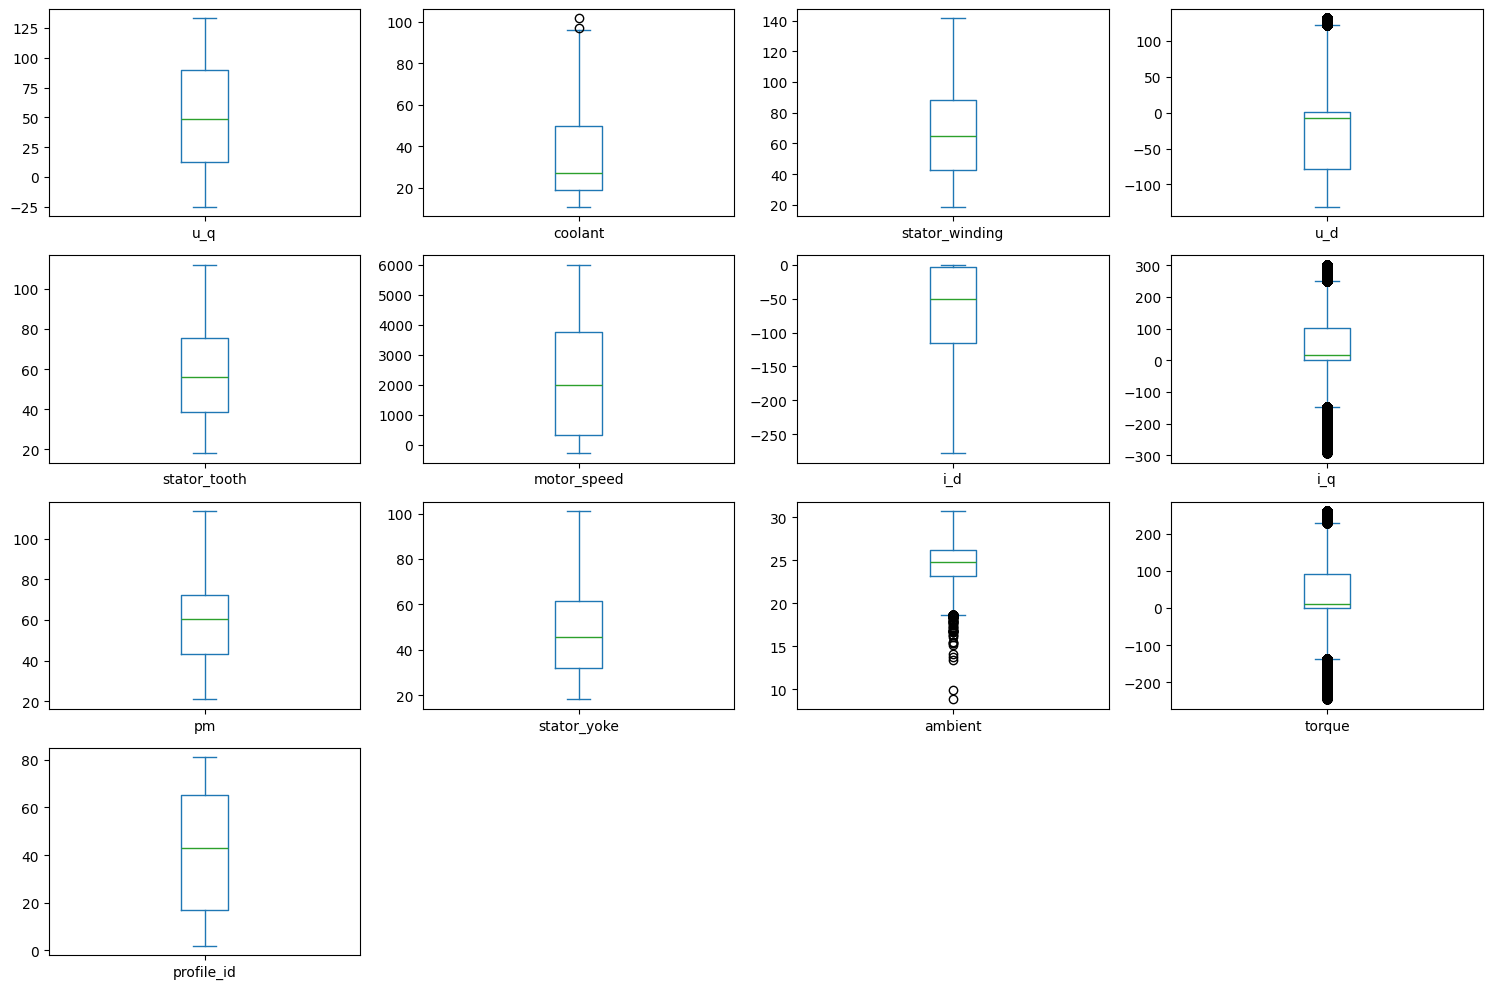

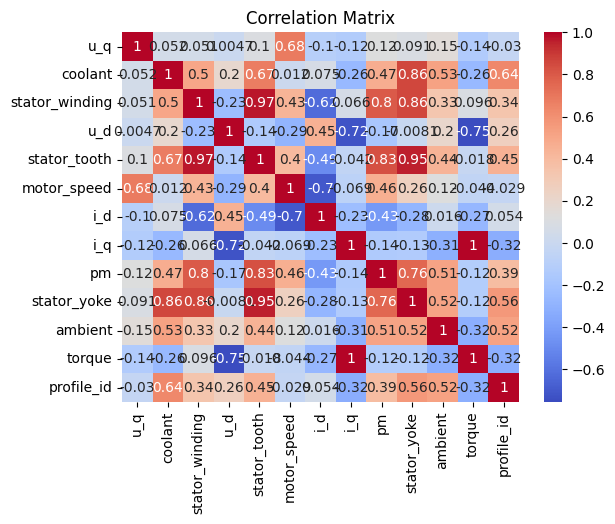

                u_q       coolant  stator_winding           u_d  stator_tooth  \
count  1.330816e+06  1.330816e+06    1.330816e+06  1.330816e+06  1.330816e+06   
mean   5.427900e+01  3.622999e+01    6.634275e+01 -2.513381e+01  5.687858e+01   
std    4.417323e+01  2.178615e+01    2.867206e+01  6.309197e+01  2.295223e+01   
min   -2.529093e+01  1.062375e+01    1.858582e+01 -1.315304e+02  1.813398e+01   
25%    1.206992e+01  1.869814e+01    4.278796e+01 -7.869090e+01  3.841601e+01   
50%    4.893818e+01  2.690014e+01    6.511013e+01 -7.429755e+00  5.603635e+01   
75%    9.003439e+01  4.985749e+01    8.814114e+01  1.470271e+00  7.558668e+01   
max    1.330370e+02  1.015985e+02    1.413629e+02  1.314698e+02  1.119464e+02   

        motor_speed           i_d           i_q            pm   stator_yoke  \
count  1.330816e+06  1.330816e+06  1.330816e+06  1.330816e+06  1.330816e+06   
mean   2.202081e+03 -6.871681e+01  3.741278e+01  5.850678e+01  4.818796e+01   
std    1.859663e+03  6.493323e+01

In [13]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import joblib
import os


df = pd.read_csv(r'E:\smart_bridge_project\data.csv')

# exploring the data
df.head(10)

df.hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()


    # Distribution plot
df.plot(kind='box', subplots=True, layout=(4, 4), figsize=(15, 10), sharex=False)
plt.tight_layout()
plt.show()

    # Boxplot for all features
df.plot(kind='box', subplots=True, layout=(4, 4), figsize=(15, 10), sharex=False)
plt.tight_layout()
plt.show()

## Multivariate analysis

sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

## descriptive analysis
print(df.describe())
print("\nMissing values:\n", df.isnull().sum())
print("\nDuplicate rows:", df.duplicated().sum())







### preprocessing toolkit

In [14]:
# droping unwanted features

df = df.drop(columns=['profile_id'])  # Drop unwanted column

# Remove outliers using IQR
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]


# applying feature scaling for it

scaler = StandardScaler()
X = df.drop('pm', axis=1)  # Features
y = df['pm']               # Target
X_scaled = scaler.fit_transform(X)

# splitting data into training set and test set

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=18)




### model training toolkit

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

In [16]:
linearR_model = LinearRegression()
linearR_model.fit(X_train, y_train)
lr_pred = linearR_model.predict(X_test)
print("Linear Regression:")
print("  MSE:", mean_squared_error(y_test, lr_pred))
print("  R² :", r2_score(y_test, lr_pred))


Linear Regression:
  MSE: 51.5852662641931
  R² : 0.8585654658203111


In [17]:
# Model 2: Decision Tree Regressor
DT_model = DecisionTreeRegressor(random_state=0)
DT_model.fit(X_train, y_train)
dt_pred = DT_model.predict(X_test)
print("Decision Tree:")
print("  MSE:", mean_squared_error(y_test, dt_pred))
print("  R² :", r2_score(y_test, dt_pred))



Decision Tree:
  MSE: 0.59764996852936
  R² : 0.998361385895179


In [18]:
# Model 3: Random Forest Regressor
RF_model = RandomForestRegressor(n_estimators=5, random_state=0)
RF_model.fit(X_train, y_train)
rf_pred = RF_model.predict(X_test)
print("Random Forest:")
print("  MSE:", mean_squared_error(y_test, rf_pred))
print("  R² :", r2_score(y_test, rf_pred))


Random Forest:
  MSE: 0.34923325102482405
  R² : 0.9990424854661836


In [19]:
os.makedirs("model", exist_ok=True)
joblib.dump(RF_model, 'model/model.save') 



['model/model.save']

In [20]:
X.columns


Index(['u_q', 'coolant', 'stator_winding', 'u_d', 'stator_tooth',
       'motor_speed', 'i_d', 'i_q', 'stator_yoke', 'ambient', 'torque'],
      dtype='object')